In [224]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [225]:
data = pd.read_csv("lyft.csv")

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [226]:
data.head()

,can_request_ride,currency,date,day,display_name,end_latitude,end_longitude,estimated_cost_cents_max,estimated_cost_cents_min,estimated_distance_miles,estimated_duration_seconds,is_valid_estimate,primetime_percentage,ride_type,start_latitude,start_longitude,time
0,True,USD,23-Feb-18,Friday,Lyft Premier,42.355912,-71.065922,1526,1526,1.96,542,True,0%,lyft_premier,42.37245,-71.07915,0:42:11
1,True,USD,23-Feb-18,Friday,Lyft Line,42.355912,-71.065922,523,523,1.96,542,True,0%,lyft_line,42.37245,-71.07915,0:42:11
2,True,USD,23-Feb-18,Friday,Lyft Lux,42.355912,-71.065922,1986,1986,1.96,542,True,0%,lyft_lux,42.37245,-71.07915,0:42:11
3,True,USD,23-Feb-18,Friday,Lyft,42.355912,-71.065922,780,780,1.96,542,True,0%,lyft,42.37245,-71.07915,0:42:11
4,True,USD,23-Feb-18,Friday,Lyft Plus,42.355912,-71.065922,1317,1317,1.96,542,True,0%,lyft_plus,42.37245,-71.07915,0:42:11


In [227]:
data['date_time'] = data['date'] + ' ' + data['time']

In [228]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [229]:
data = data.set_index(pd.DatetimeIndex(data['date_time']))

In [230]:
data.index

DatetimeIndex(['2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:54:56', '2018-02-23 00:54:56',
               '2018-02-23 00:54:56', '2018-02-23 00:54:56',
               ...
               '2018-04-10 04:00:03', '2018-04-10 04:00:03',
               '2018-04-10 04:00:03', '2018-04-10 04:00:03',
               '2018-04-10 04:01:03', '2018-04-10 04:01:03',
               '2018-04-10 04:01:03', '2018-04-10 04:01:03',
               '2018-04-10 04:01:03', '2018-04-10 04:01:03'],
              dtype='datetime64[ns]', name='date_time', length=383584, freq=None)

In [231]:
data=data['2018-03-01 00:00:00':'2018-03-31 23:59:59']

In [232]:
data.index

DatetimeIndex(['2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:01:03', '2018-03-01 00:01:03',
               '2018-03-01 00:01:03', '2018-03-01 00:01:03',
               ...
               '2018-03-31 23:58:03', '2018-03-31 23:58:03',
               '2018-03-31 23:58:03', '2018-03-31 23:58:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03'],
              dtype='datetime64[ns]', name='date_time', length=266609, freq=None)

In [233]:
data.columns

Index(['can_request_ride', 'currency', 'date', 'day', 'display_name',
       'end_latitude', 'end_longitude', 'estimated_cost_cents_max',
       'estimated_cost_cents_min', 'estimated_distance_miles',
       'estimated_duration_seconds', 'is_valid_estimate',
       'primetime_percentage', 'ride_type', 'start_latitude',
       'start_longitude', 'time', 'date_time'],
      dtype='object')

Lyft Line is same type as Pool of Uber

In [234]:
data_lyft_line = data[data.display_name == 'Lyft Line']

In [235]:
data_lyft_line.drop(['can_request_ride','currency', 'display_name',
              'end_latitude','end_longitude','is_valid_estimate','primetime_percentage','ride_type',
              'start_latitude','start_longitude'], axis=1, inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [236]:
data_lyft_line.columns

Index(['date', 'day', 'estimated_cost_cents_max', 'estimated_cost_cents_min',
       'estimated_distance_miles', 'estimated_duration_seconds', 'time',
       'date_time'],
      dtype='object')

Since Uber uses dollar to estimate and Lyft uses cents, we need to change cents to dollars in Lyft

In [237]:
data_lyft_line['lyft_max_estimate'] = (data_lyft_line['estimated_cost_cents_max']).divide(100)
data_lyft_line['lyft_min_estimate'] = (data_lyft_line['estimated_cost_cents_min']).divide(100)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [238]:
data_lyft_line.drop(['estimated_cost_cents_max'], axis=1, inplace=True)
data_lyft_line.drop(['estimated_cost_cents_min'], axis=1, inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [239]:
data_lyft_line['estimate'] = (data_lyft_line['lyft_max_estimate'] + data_lyft_line['lyft_min_estimate'])/2

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Also, make the column names shorter

In [240]:
data_lyft_line.rename(columns={"estimate": "lyft_estimate"},inplace=True)
data_lyft_line.rename(columns={"estimated_distance_miles": "lyft_distance"},inplace=True)
data_lyft_line.rename(columns={"estimated_duration_seconds": "lyft_duration"},inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [241]:
data_lyft_line['lyft_price_per_second'] = data_lyft_line['lyft_estimate']/data_lyft_line['lyft_duration']

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
data_lyft_line.head()

,date,day,lyft_distance,lyft_duration,time,date_time,lyft_max_estimate,lyft_min_estimate,lyft_estimate,lyft_price_per_second
date_time,,,,,,,,,,
2018-03-01 00:00:03,1-Mar-18,Thursday,1.76,414,0:00:03,2018-03-01 00:00:03,3.40,3.40,3.40,0.008213
2018-03-01 00:01:03,1-Mar-18,Thursday,1.79,537,0:01:03,2018-03-01 00:01:03,3.53,3.53,3.53,0.006574
2018-03-01 00:02:03,1-Mar-18,Thursday,2.20,487,0:02:03,2018-03-01 00:02:03,3.85,3.85,3.85,0.007906
2018-03-01 00:03:02,1-Mar-18,Thursday,1.70,472,0:03:02,2018-03-01 00:03:02,3.46,3.46,3.46,0.007331
2018-03-01 00:04:02,1-Mar-18,Thursday,2.21,553,0:04:02,2018-03-01 00:04:02,3.47,3.47,3.47,0.006275


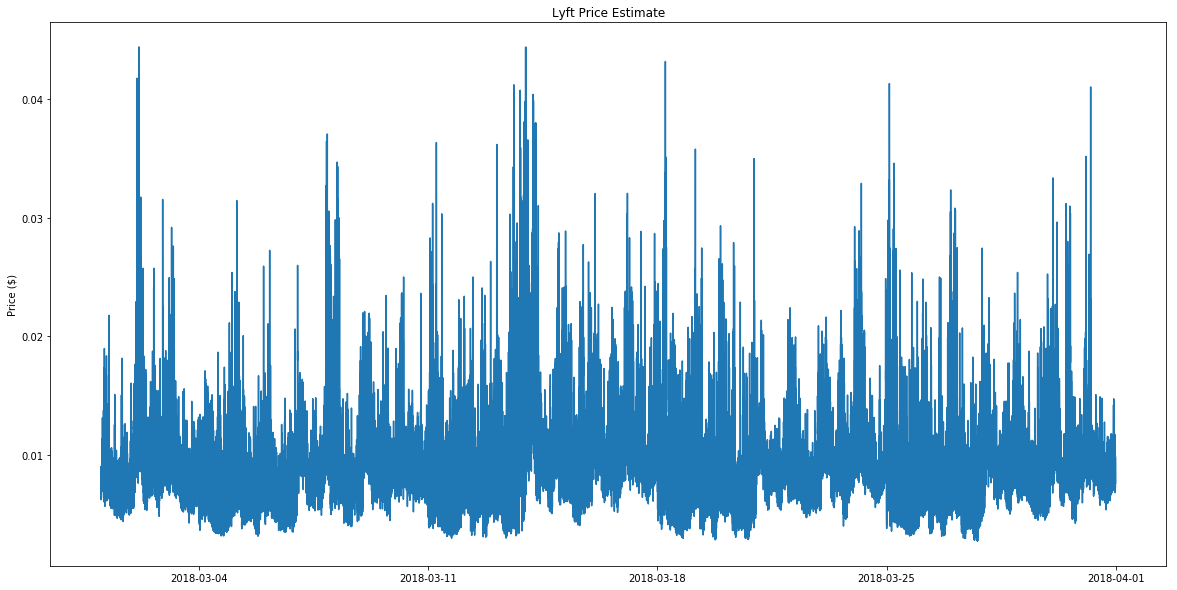

In [243]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data_lyft_line.index, data_lyft_line['lyft_price_per_second'])
plt.title('Lyft Price Estimate')
plt.ylabel('Price ($)')
plt.show()

In [244]:
data_lyft_line.drop(['date_time'], axis=1, inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [245]:
data_lyft_line.to_csv('lyft_line_March.csv', sep=',')